In [198]:
# Import the required libraries. Add more as needed, e.g. for feature selection.

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/huongbui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/huongbui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [199]:
# Read the train and test data from csv files to dataframes

train = pd.read_csv("new_train.csv", header = None, names = ['rating', 'review'])
test = pd.read_csv("new_test.csv", header = None, names = ['review'])
# print(train.shape)

In [200]:
# This function takes a review as an input and returns the cleaned review

def CleanText(review):
    
    # convert the text to lower case and then remove unnecessary text (numbers, spaces etc.) from the reviews using regex
    # tokenize the words
    # remove stop words
    # Apply stemming 
    

    review = review.lower()
    
    # Remove special characters, numbers, and punctuation
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    
    # Tokenize the words
    tokens = word_tokenize(review)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Apply stemming
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in tokens]
    
    # Join the words to form a sentence and return it
    cleaned_review = " ".join(stemmed)
    
    return cleaned_review
#     cleaned_review = " ".join(cleaned_words)
    
    
#     return cleaned_review

In [201]:
# Apply the CleanText function to clean the reviews
train['review_cleaned'] = train['review'].apply(CleanText)
test['review_cleaned'] = test['review'].apply(CleanText)
# print(test['review_cleaned'] )

In [202]:
# This function takes all train and test reviews as input and convert them to vectors using CountVectorizer or TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

def text_feature_selector(train, test):
    
    # Initialize the CountVectorizer or TF-IDF vectorizer
    # Fit and transform the cleaned reviews of train using Vectorizer
    # Transform the cleaned review of test using the Vectorizer
    # After this step you will be left with train features and test features
    
    # Next step is to select best features
    
    # Initialize feature selector
    # Fit and transform train features using the feature selector
    # Transform the test features using the feature selector
    
    # finally return the transformed train and test features
    
    # return train features, test features
#     return train_features, test_features
# Initialize the TF-IDF vectorizer
    vectorizer = TfidfVectorizer()  # You can change this to CountVectorizer if needed
    
    # Fit and transform the cleaned reviews of train using Vectorizer
    train_features = vectorizer.fit_transform(train['review_cleaned'])
    print(train_features.shape)
    # Transform the cleaned review of test using the Vectorizer
    test_features = vectorizer.transform(test['review_cleaned'])

    selector = SelectKBest(chi2, k=100)  # You can change the value of k as needed
    
    # Fit and transform train features using the feature selector
    train_features_selected = selector.fit_transform(train_features, train['rating'])
    
    # Transform the test features using the feature selector
    test_features_selected = selector.transform(test_features)
    print(test_features_selected.shape)
    # Finally, return the transformed train and test features
    return train_features_selected, test_features_selected
    # If the features are sparse matrices, convert them to dense arrays
#     return train_features, test_features

(18000, 48685)
(18000, 100)


(<18000x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 114480 stored elements in Compressed Sparse Row format>,
 <18000x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 119046 stored elements in Compressed Sparse Row format>)

In [351]:
# This class implements the KNN algorithm
from sklearn.utils import shuffle
from collections import Counter
class KNN():
    def __init__(self, k = 9, similarity_function = 'cosine'):
        
        self.k = k
        self.similarity_function = similarity_function
        # Try with at least two similarity functions and pass the similarity function accordingly while initializing the class object
    
    # Initialize the train and target
    def fit(self, train_features, train_ratings):
        self.train_features = train_features
        self.train_ratings = train_ratings
        
    # Predict the labels for test set using the nearest neighbors in train set
    def predict(self, test_features):

                  
        similarity_matrix = cosine_similarity(test_features, self.train_features)
        k_indices = np.argsort(-similarity_matrix, axis=1)[:, :self.k]

        

        most_frequent_labels = []
        for indices in k_indices:
            labels = self.train_ratings[indices]  
            most_frequent_label = Counter(labels).most_common(1)[0][0]
            most_frequent_labels.append(most_frequent_label)
        return most_frequent_labels
       

In [352]:
# Cross validation to find the best K value. You can also do this to find the best feature set.
# First shuffle the entire train data and divide it into k roughly equal sized folds 
# The training and evaluation process is repeated 'k' times, with each iteration using a different fold as the test set and the remaining k-1 folds as the training set.
# The K-nearest neighbors classifier is used to predict the labels of the test set using the remaining (k-1) folds as train.
# The cross validation function should return the best K value (here K stands for number of nearest neighbors)
from sklearn.metrics import accuracy_score

def CrossValidation(train):
    
#     shuffled_train = # shuffle train data (reset the indices after shuffling the data)
#     k_values = # define a list of k values
#     n_folds = # define the number of folds
    
    '''
    1) Divide the data into k folds (n_folds)
    
    2) After dividing the data into k folds,for each fold call text_feature_selector() to get the features of train folds and test fold
    
    
    3) Initialize and fit the KNN class and with the help of predict method in the KNN class, get the labels for the test fold
    
    4) Each example in test fold has a target (rating), with the help of predicted label and target, find the accuracy for each fold
    
    5) Find the average accuracy of all k-folds
    
    Repeat the above steps for all values of k in k_values
    
    Find the value of k for which the average accuracy of all folds is high compared to other k values and return it
    Also return the average accuracy of k-folds for each value of k
    '''
    
    
#     return best_k, accuracies
#     shuffled_train = shuffle(train).reset_index(drop=True)  # Shuffle train data and reset indices
    

    shuffled_train = shuffle(train).reset_index(drop=True)  # Shuffle train data and reset indices
    k_values = [3, 5, 7, 9, 11,13,15,17]  # Define a list of k values
    n_folds = 6  # Define the number of folds
    
    accuracies = {}  # Dictionary to store accuracies for each k value
    
    for k in k_values:
        fold_accuracies = []  # List to store accuracies for each fold
        
        

        # Divide data into k folds
        fold_size = len(shuffled_train) // n_folds
#         folds = [shuffled_train[i*fold_size:(i+1)*fold_size] for i in range(n_folds)]
        folds = [shuffled_train[i*fold_size:(i+1)*fold_size] for i in range(0, n_folds)]

  
        
        for i in range(n_folds):
            # Split data into train and test folds
            test_fold = folds[i]
            train_folds = pd.concat([fold for j, fold in enumerate(folds) if j != i])
            
            # Reset indices of train_ratings
            train_ratings = train_folds['rating'].reset_index(drop=True)

            train_features, test_features = text_feature_selector(train_folds, test_fold)

            
            
            # Initialize and fit the KNN class
            knn = KNN(k=k)
            knn.fit(train_features, train_ratings)
#           
            # Get predicted labels for the test fold
            predicted_labels = knn.predict(test_features)
            
            # Calculate accuracy for this fold
            accuracy = accuracy_score(test_fold['rating'], predicted_labels)
            print(accuracy)
#             print(accuracy)
            fold_accuracies.append(accuracy)
        
        # Calculate average accuracy for this k value
        avg_accuracy = np.mean(fold_accuracies)
        accuracies[k] = avg_accuracy
    
    # Find the best k value
    best_k = max(accuracies, key=accuracies.get)

    return best_k, accuracies
    

In [353]:
best_k, accuracies = CrossValidation(train)
print(best_k)
print(accuracies)

(15000, 43086)
(3000, 100)
0.8106666666666666
(15000, 43094)
(3000, 100)
0.8173333333333334
(15000, 42858)
(3000, 100)
0.8063333333333333
(15000, 43224)
(3000, 100)
0.8296666666666667
(15000, 43304)
(3000, 100)
0.813
(15000, 43265)
(3000, 100)
0.8033333333333333
(15000, 43086)
(3000, 100)
0.8293333333333334
(15000, 43094)
(3000, 100)
0.824
(15000, 42858)
(3000, 100)
0.8176666666666667
(15000, 43224)
(3000, 100)
0.8423333333333334
(15000, 43304)
(3000, 100)
0.817
(15000, 43265)
(3000, 100)
0.812
(15000, 43086)
(3000, 100)
0.825
(15000, 43094)
(3000, 100)
0.8293333333333334
(15000, 42858)
(3000, 100)
0.8113333333333334
(15000, 43224)
(3000, 100)
0.833
(15000, 43304)
(3000, 100)
0.8256666666666667
(15000, 43265)
(3000, 100)
0.8176666666666667
(15000, 43086)
(3000, 100)
0.8276666666666667
(15000, 43094)
(3000, 100)
0.8366666666666667
(15000, 42858)
(3000, 100)
0.8143333333333334
(15000, 43224)
(3000, 100)
0.8353333333333334
(15000, 43304)
(3000, 100)
0.8376666666666667
(15000, 43265)
(3000

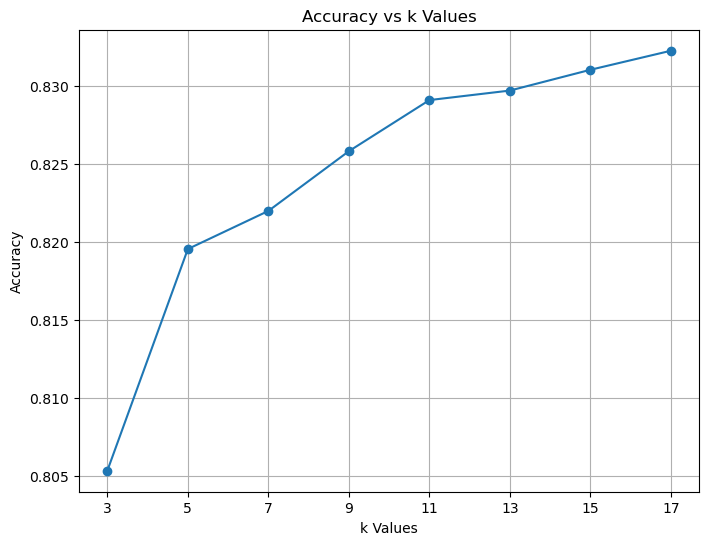

In [331]:
k_values = list(accuracies.keys())
accuracy_values = list(accuracies.values())

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs k Values')
plt.xlabel('k Values')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()

In [ ]:
# Plot the accuracies (y-axis) vs k_values (x-axis) using matplotlib

In [332]:
# Initialize the KNN class with best_k value and predict the labels for test set using the entire train set
best_k = 17
train_features, test_features = text_feature_selector(train, test)
knn_classifier = KNN(k=best_k)
train_ratings = train['rating'].reset_index(drop=True)
# Fit the KNN classifier with the entire train set
knn_classifier.fit(train_features, train_ratings)

# Predict the labels for the test set
predicted_labels = knn_classifier.predict(test_features)
print(predicted_labels)
output_file_path = "predicted_labels.txt"

# Open the output file in write mode
with open(output_file_path, "w") as output_file:
    # Write each predicted label to the file
    for label in predicted_labels:
        output_file.write(str(label) + "\n")

(18000, 48685)
(18000, 100)
[-1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1,

In [34]:
# Write the predicted labels of the test set to a .txt file and upload the .txt file to miner